# Titanic competition 



In [1]:
import numpy as np  
import pandas as pd  
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [7]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [8]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])

train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_encoder.transform(test_df['Embarked'])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
Y = train_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
Logistic_Regression_Accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', Logistic_Regression_Accuracy)

Logistic Regression Accuracy: 0.8100558659217877


In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=50)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
Decision_Tree_Accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', Decision_Tree_Accuracy)

Decision Tree Accuracy: 0.7932960893854749


In [26]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
SVM_Accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', SVM_Accuracy)

SVM Accuracy: 0.7821229050279329


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
Gradient_Boosting_Accuracy = accuracy_score(y_test, y_pred)
print('Gradient Boosting Accuracy:', Gradient_Boosting_Accuracy)

Gradient Boosting Accuracy: 0.8100558659217877


In [29]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=500, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
Neural_Network_Accuracy = accuracy_score(y_test, y_pred)
print('Neural Network Accuracy:', Neural_Network_Accuracy)

Neural Network Accuracy: 0.7932960893854749


In [32]:
print('Logistic Regression Accuracy:', Logistic_Regression_Accuracy)
print('Decision Tree Accuracy:', Decision_Tree_Accuracy)
print('SVM Accuracy:', SVM_Accuracy)
print('Gradient Boosting Accuracy:', Gradient_Boosting_Accuracy)
print('Neural Network Accuracy:', Neural_Network_Accuracy)

Logistic Regression Accuracy: 0.8100558659217877
Decision Tree Accuracy: 0.7932960893854749
SVM Accuracy: 0.7821229050279329
Gradient Boosting Accuracy: 0.8100558659217877
Neural Network Accuracy: 0.7932960893854749


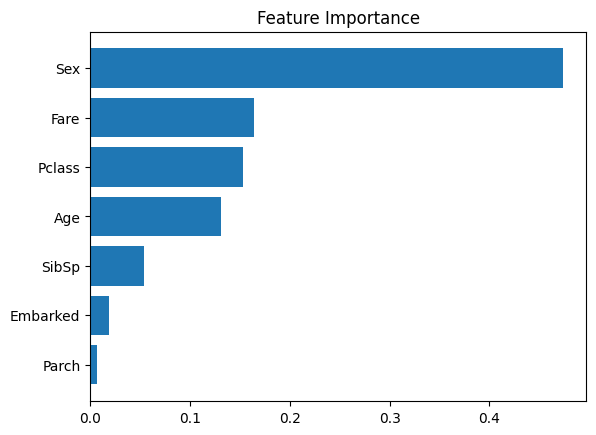

In [28]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.title('Feature Importance')
plt.show()